## Assignment - 3: The Perceptron. Question 4. 

In [3]:
import turicreate as tc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import utils
import random
random.seed(0)

**4)a Which is worse for this use case, a false positive or a false negative? What
value of ${\beta}$ would be suitable for an $F_{\beta}$ score?**

Positive (1): Malfunction is detected/Needs replacing.<br>
Negative (0): No malfunction/working correctly. 
<br>False positive: The device functions properly but will be detected as failing.
<br>False negative: The device doesn't function properly but will be tested as properly functioning. 


***worse:***<br>
False negative is worse because it is more costly and damaging if a faulty device is detected as normal but it is in fact sending out wrong data and the algorithm is not able to identity which one. While the false positive may just cost some time to exam the device or to replace a functioning device but does not bring any damage to business. For example if the device does not work properly it could cause electrical failure for hospitals, damaged equipment for businesses and disruption to communication which is far worse than the cost of replacing a functioning one. 

Given that false negatives are much more expensive than false positives, we are wanting an emphasis on recall, thus β should be larger than 1. We will choose β=10.

**4)b Load the CSV file into an SFrame named data. Print the SFrame. Split the
data into training/validation/testing sets using 80%/10%/10% respectively.**

In [4]:
# Reading the csv file into jupyter.
data = tc.SFrame.read_csv('0352069_data.csv')

# Showing the first 10 data entries in the csv file. 
data

Finished parsing file /home/xwang111/SupervisedML/Assignment3/0352069_data.csv

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Parsing completed. Parsed 100 lines in 0.028135 secs.

Finished parsing file /home/xwang111/SupervisedML/Assignment3/0352069_data.csv

Parsing completed. Parsed 1000 lines in 0.02684 secs.

Condition,Voltage,Current,Temperature
1,86.89224114413253,495.1450300424216,37.27819902151115
1,88.36353149623307,495.2937069797055,52.19576734439437
1,86.61140875619736,494.4959292614043,43.605841364121936
1,87.45407898458127,498.3686115500456,54.33669828561592
1,88.11532138867328,498.5967646562975,46.92865069045365
1,86.81101357030884,496.5428204045944,37.406933724237554
1,85.29526777535187,494.9136091334592,33.023586757504894
1,87.00410897286201,497.0345989843793,53.51165165119777
1,85.58801851781692,494.2663265159045,34.76402133414627
1,87.59104211014439,497.71702723332584,37.899530399861014


In [5]:
# split the dataset into training set and another set for validation and testing
# training (80%) / total (100%) = 0.8
training, validation_testing = data.random_split(.8, seed=0, exact=True)

In [6]:
# check the length of training set
print("Length of training set:", len(training))

Length of training set: 800


In [7]:
# equally split the validation and testing set into validation and testing
# validation (10%) / validation_test (20%) = 0.5
validation, testing = validation_testing.random_split(.5, seed=0, exact=True)

In [8]:
# check the length of validation set
print("Length of validation set:", len(validation))

# check the length of testing set
print("Length of testing set:", len(testing))

Length of validation set: 100
Length of testing set: 100


**4)c Is feature rescaling turned on by default for the function
turicreate.logistic_classifier.create? What scale are the coefficients given in?**

According to Turi Create documentaion: <br> "Feature rescaling is an important pre-processing step that ensures that all features are on the same scale. An l2-norm rescaling is performed to make sure that all features are of the same norm. Categorical features are also rescaled by rescaling the dummy variables that are used to represent them. The coefficients are returned in original scale of the problem. This process is particularly useful when features vary widely in their ranges."

The feature rescaling is turned on by default. Turi Create automatically scales the features to have mean of 0 and standard deviation 1, before fitting the model to avoid features with large magnitudes to dominate the regularization term.
<br>The coefficients returned by the turicreate.logistic_classifier.create function are in the original scale of the input features, regardless of whether the feature_rescaling parameter is set to True or False. Only in the trainng process, if the parameter 'feature_reascaling' is set to 'True', the input features will be rescaled before fitting the model, and the coefficients will be scaled accordingly.

**4)d Create perceptrons using Turicreate to classify data with ‘Condition’ as
the target. Be sure to use your validation set in the training. Experiment with
different values of hyperparameters to develop two different models.**

Hyperparameters for Model 1:<br>1. l1 penalty=0.01<br>2. l2 penalty=0.01<br>3. feature rescaling=False<br>4. convergence threshold=0.01<br>5. solver='fista'

In [9]:
# Define our first model perceptron 1 using hyperparameters: L1 = 0.01, L2 = 0.01, Feature scaling: False. 
perceptron_1 = tc.logistic_classifier.create(training, target='Condition'
                                             , l1_penalty=0.01, l2_penalty=0.01
                                             , feature_rescaling=False, validation_set=validation
                                             , convergence_threshold=0.01
                                             , solver='fista', seed=0)

Logistic regression:

--------------------------------------------------------

Number of examples          : 800

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients      : 4

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

Tuning step size. First iteration could take longer than subsequent iterations.

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 1        | 1.000000  | 1.001470     | 0.493750          | 0.500000            |

| 1         | 2        | 0.000000  | 1.031770     | 0.506250          | 0.500000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

Hyperparameters for Model 2:<br>1. l1 penalty=0.0<br>2. l2 penalty=0.0<br>3. feature rescaling=True<br>4. convergence threshold=0.01<br>5. solver='newton'

In [10]:
# Define our second model perceptron 2 using hyperparameters: L1 = 0.0, L2 = 0.0, Feature scaling: True.
perceptron_2 = tc.logistic_classifier.create(training, target='Condition'
                                             , l1_penalty=0.0, l2_penalty=0.0
                                             , feature_rescaling=True, validation_set=validation
                                             , convergence_threshold=0.01
                                             , solver='newton', seed=0)

Logistic regression:

--------------------------------------------------------

Number of examples          : 800

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients      : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.001301     | 0.887500          | 0.850000            |

| 2         | 3        | 0.003702     | 0.887500          | 0.850000            |

| 3         | 4        | 0.005905     | 0.887500          | 0.850000            |

| 4         | 5        | 0.008617     | 0.887500          | 0.850000            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

After experimenting on different hyperparameters, we found that the hyperparameter that makes a big difference between models here is the feature rescaling, while other hyperparamters just show differences of how quick a model can reach an optimal solution. 

**4)e i) find predictions using the testing set;**

In [11]:
# Define predictions for first model using the testing set. 
prediction_1 = perceptron_1.predict(testing)

# Define predictions for second model using the testing set.
prediction_2 = perceptron_2.predict(testing)

# Create a dictionary to view the predicitons from the testing set.
prediction_dict = {'Prediction1':prediction_1, 'Prediction2':prediction_2, 'Label':testing['Condition']}

# Turning the dictionary into a data frame. 
sf = tc.SFrame(prediction_dict)

# Showing the predicitons of both models relative the labels. 
sf.explore('Prediction')

,Label,Prediction1,Prediction2
0,1,0,1
1,1,0,1
2,0,0,1
3,0,0,1
4,1,0,1
5,1,0,1
6,1,0,1
7,0,0,1
8,1,0,1
9,1,0,1


**4)e ii) display the training/validation/testing accuracy;**

In [12]:
# Showing the accuracy in training, testing, validation. 
# Model 1: 
print('Training set of Perceptron_1 accuracy:', perceptron_1.evaluate(training)['accuracy'])
print('Testing set of Perceptron_1 accuracy:', perceptron_1.evaluate(testing)['accuracy'])
print('Validation set of Perceptron_1 accuracy:', perceptron_1.evaluate(validation)['accuracy'], "\n")

# Model 2: 
print('Training set of of Perceptron_2 accuracy:', perceptron_2.evaluate(training)['accuracy'])
print('Testing set of Perceptron_2 accuracy:', perceptron_2.evaluate(testing)['accuracy'])
print('Validation set of Perceptron_2 accuracy:', perceptron_2.evaluate(validation)['accuracy'])

Training set of Perceptron_1 accuracy: 0.50625
Testing set of Perceptron_1 accuracy: 0.53
Validation set of Perceptron_1 accuracy: 0.5 

Training set of of Perceptron_2 accuracy: 0.8875
Testing set of Perceptron_2 accuracy: 0.89
Validation set of Perceptron_2 accuracy: 0.85


We've included some $3D$ plots of the two models. Blue is a correct prediction and yellow is an incorrect prediciton. 

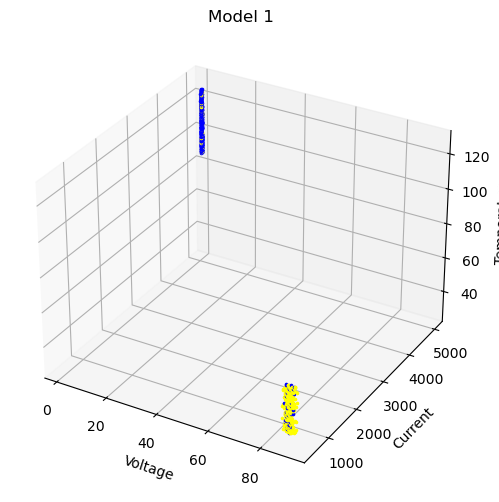

In [13]:
# Plot the model for perceptron 1. 
fig = plt.figure(figsize = (8,6))

# set the ax to 3D porjection
ax = plt.axes(projection='3d')

# name the title
ax.set_title('Model 1')

# name the x axis
ax.set_xlabel('Voltage')

# name the y axis
ax.set_ylabel('Current')

# name the z axis
ax.set_zlabel('Temperature')

# Test to see how many were correctly predicted. 
condition_t = training['Condition']

# Set prediciton variable for perceptron 1. 
prediction_t_1 = perceptron_1.predict(training)

# Need to run through the points to check conditions. 
for i in range(len(condition_t)):
    
    # Testing to see if prediciton is accurate and colour blue. 
    if condition_t[i] == prediction_t_1[i]:
        ax.scatter(training['Voltage'][i], training['Current'][i], training['Temperature'][i], s=10, c='blue', marker='.')
   
    # If condition is not accurate it will colour yellow.     
    else:
        ax.scatter(training['Voltage'][i], training['Current'][i], training['Temperature'][i], s=10, c='yellow', marker='.')

# Graph the plot. 
plt.show()

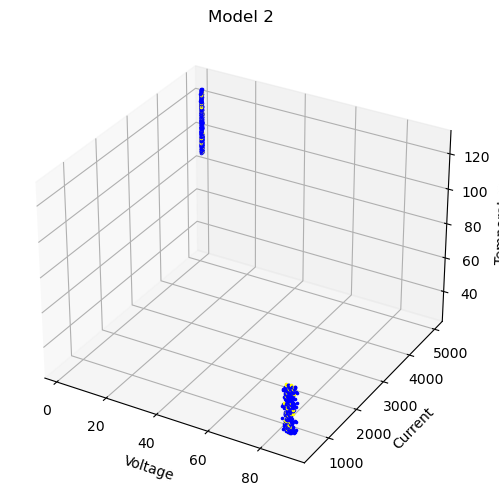

In [14]:
# Plot the model for perceptron 1. 
fig = plt.figure(figsize = (8,6))

# set the ax to 3D porjection
ax = plt.axes(projection='3d')

# name the title
ax.set_title('Model 2')

# name the x axis
ax.set_xlabel('Voltage')

# name the y axis
ax.set_ylabel('Current')

# name the z axis
ax.set_zlabel('Temperature')

# Test to see how many were correctly predicted. 
condition_t = training['Condition']

# Set prediciton variable for perceptron 2. 
prediction_t_2 = perceptron_2.predict(training)

# Need to run through the points to check conditions. 
for i in range(len(condition_t)):
    
    # Testing to see if prediciton is accurate and colour blue. 
    if condition_t[i] == prediction_t_2[i]:
        ax.scatter(training['Voltage'][i], training['Current'][i], training['Temperature'][i], s=10, c='blue', marker='.')
   
    # If condition is not accurate it will colour yellow.     
    else:
        ax.scatter(training['Voltage'][i], training['Current'][i], training['Temperature'][i], s=10, c='yellow', marker='.')

# Graph the plot. 
plt.show()

**4)e iii) display the confusion matrix on the testing set;**

In [15]:
# Showing confusion matrix to find the count of correct and incorrect gueses. 
# Model 1. 
cm_1 = perceptron_1.evaluate(testing)['confusion_matrix']

# Show the matrix.
cm_1

target_label,predicted_label,count
0,0,53
1,0,47


In [16]:
# Showing confusion matrix for model 2.
cm_2 = perceptron_2.evaluate(testing)['confusion_matrix']

# Show the matrix. 
cm_2

target_label,predicted_label,count
0,1,8
1,1,44
0,0,45
1,0,3


In [17]:
# Creating a dictionary for model 1 and its success/failure.
datadict_1 = {'Model 1': ['Failure','Success'], 'Detected failure':[0, 0], 'Detected success':[cm_1['count'][1],cm_1['count'][0]]}

# Turning it into a data frame. 
dt_1 = tc.SFrame(datadict_1)

# Showing the data frame. 
dt_1

Detected failure,Detected success,Model 1
0,47,Failure
0,53,Success


In [18]:
# Creating a dictionary for model 2 and its success/failure. 
datadict_2 = {'Model 2': ['Failure','Success'], 'Detected failure':[cm_2['count'][1],cm_2['count'][0]], 'Detected success':[cm_2['count'][3],cm_2['count'][2]]}

# Turning it into a data frame. 
dt_2 = tc.SFrame(datadict_2)

# Showing the data framne. 
dt_2

Detected failure,Detected success,Model 2
44,3,Failure
8,45,Success


**4)e iv) calculate recall, precision, sensitivity and specificity on the testing set;**

**Model 1  ;  Model 2** <br>
$TP = 0 ; \quad TP = 44$

$FP = 0 ; \quad FP = 8$

$TN = 53 ; \quad TN = 45$

$FN = 47 ; \quad FN = 3$

**Model 1:** <br><br>
*Recall* =  $\frac{TP}{TP+FN} = \frac{0}{0+47} = 0.00\%$<br><br>
*Precision* = $\frac{TP}{TP+FP} = \frac{0}{0+0}$ is undefined, by convention a model that has no false positves has precision $100.00\%$<br><br>
*Sensitivity* = *Recall* = $0.00\%$<br><br>
*Specificity* = $\frac{TN}{TN+FP} = \frac{53}{53+0} = 100.00\%$ <br><br>

**Model 2:** <br><br>
*Recall* =  $\frac{TP}{TP+FN} = \frac{44}{44+3} = 93.62\%$<br><br>
*Precision* = $\frac{TP}{TP+FP} = \frac{44}{44+8} = 84.62\%$<br><br>
*Sensitivity* = *Recall* = $93.62\%$<br><br>
*Specificity* = $\frac{TN}{TN+FP} = \frac{45}{45+8} = 84.91\%$

In [19]:
perceptron_2.evaluate(testing)

{'accuracy': 0.89,
 'auc': 0.9154957848253711,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |   8   |
 |      1       |        1        |   44  |
 |      0       |        0        |   45  |
 |      1       |        0        |   3   |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.8888888888888888,
 'log_loss': 0.33862262439697616,
 'precision': 0.8461538461538461,
 'recall': 0.9361702127659575,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+----+----+
 | threshold | fpr | tpr | p  | n  |
 +-----------+-----+-----+----+----+
 |    0.0    | 1.0 | 1.0 | 47 | 53 |
 |   0.001   | 1.0 | 1.0 | 47 | 53 |
 |   0.002   | 1.0 | 1.0 | 47 | 53 |
 |   0.003   | 1.

**4)e v) calculate the $F_{\beta}$ score on the testing set using the value of ${\beta}$ you chose above.**

In [20]:
# Define the f-score function. Pass beta, precision, recall.  
def fbeta(beta, precision, recall): 
    
    # Input the formula for F beta score. 
    score = ((1+beta**2) * precision * recall) / (beta**2 * precision + recall)
    
    # Return the F beta score. 
    return score 

In [21]:
# Calculate F beta for beta = 0.1. 
fbeta(0.1, 0.8462, 0.9362)

0.8470061931145743

In [22]:
# Calculate F beta for beta = 1. 
fbeta(1, 0.8462, 0.9362)

0.8889277827648115

In [23]:
# Calculate F beta for beta = 10. 
fbeta(10, 0.8462, 0.9362)

0.9352151736519388

# **The $F_{\beta}$ formula.**<br> 
Where, precision = $P$, recall = $R$ <br>
$P, R>=0, {\beta}>0$ <br><br>
$F_{\beta}(P, R) = \frac{(1+\beta^2)PR}{\beta^2P+R}$ <br><br> **Model 1:** <br> <br>
$F_{\beta} = 0$ for all ${\beta}\in [0, \infty)$ <br> Since $R=0$, $P{\ne0}$ <br><br> **Model 2:** <br> <br>
$F_{\beta} = \frac{(1+\beta^2)*0.9362*.8462}{\beta^2 * 0.8462+0.9362}$ <br> <br>
for $\beta = 0.1,  1,  10$ <br> 
$F_{0.1} = 0.8470 ; \quad F_1 = 0.8889 ; \quad F_{10} = 0.9352$<br><br> 
If we want to minimize false negatives, we need ${\beta}>>1$.  
Choose ${\beta}= 10$ since for ${\beta}>>1$ , $F_{\beta}\rightarrow P$. <br>
Thus our $F_{\beta} = 0.9352$.

**4)f Select which of your two models is the best (or declare a tie) and justify
your choice.**

It is clear that the **Model 2 (second perceptron)** is better overall for our use case. Model 1 that cannot detect any faulty sensors is for sure not a good model. It is not surprising given that model 1 was always prediciting negatives and hence was never predicting faulty sensors to replace in the sub-station use case after we shut down the feature rescaling function. By examing the dataset in the csv file, we found the dispersity of data range is very wide and the unregulated features in model 1 will result in features (e.g.current in our case) with large magnitudes dominating the regularization, thus the cluster with small magnitude features will never get touched. Futhermore, we placed a higher emphasis on false negatives  (faulty sensors detected as normal) which means we need a high recall model. The model 2 achieved a recall of 93.62%, which is higher than the precision of 84.62%, but not demonstrate a big gap. This model is the best because you have a higher chance to find most of the faulty sensors in the sub station. 

We also tried out different models with various hyperparameters such as l1_penalty, l2_penalty, convergence_threshold, solver, but the accuracy can't be improved any better and stays the same around 0.85. We tried to find out the answer by examing the 3D graphs. From the two above graphs, we see clusters of points with both conditions present in each cluster set, meaning the faulty preditions (yellow) and right predictions (blue) are mixed together in both clusters. It is not easy for a plane to separate two classes thoroughly. This tells us that our model may not reach 100% accuracy, but it is still the best model we can achieve here.